## Intensity

In this chapter, we will work with a hand radiograph from a 2017 Radiological Society of North America competition. X-ray absorption is highest in dense tissue such as bone, so the resulting intensities should be high. Consequently, images like this can be used to predict "bone age" in children.

To start, let's load the image and check its intensity range.

The image datatype determines the range of possible intensities: e.g., 8-bit unsigned integers (uint8) can take values in the range of 0 to 255. A colorbar can be helpful for connecting these values to the visualized image.

All exercises in this chapter have the following imports:

```
import imageio
import numpy as np
import matplotlib.pyplot as plt
```

In [24]:
%matplotlib inline

import imageio
import numpy as np
import matplotlib.pyplot as plt

Data type: uint8
Min. value: 3
Max value: 224


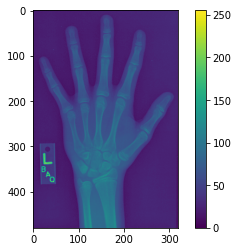

In [25]:
# Load the hand radiograph
im = imageio.imread("Data/hand.png")

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()

## Histograms

Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the cumulative distribution function. It measures the frequency with which a given range of pixel intensities occurs.

For this exercise, describe the intensity distribution in im by calculating the histogram and cumulative distribution function and displaying them together.

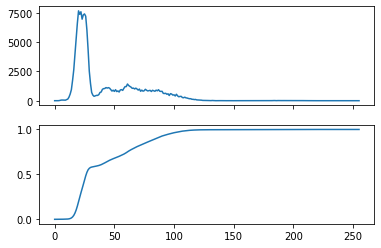

In [26]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')


# Masks

## Create a mask

Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)

Below is the histogram of im colored by the segments we will plot.

![masks](Data/Masksplot.png)



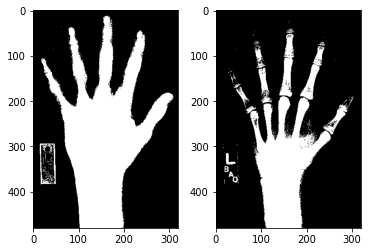

In [85]:
im = imageio.imread("Data/hand.png")
mask_bone = im >= 66
mask_skin = (im >= 45) & (im < 145)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')

## Apply a mask
Although masks are binary, they can be applied to images to filter out pixels where the mask is False.

NumPy's where() function is a flexible way of applying masks. It takes three arguments:
```
np.where(condition, x, y)
```
condition, x and y can be either arrays or single values. This allows you to pass through original image values while setting masked values to 0.

Let's practice applying masks by selecting the bone-like pixels from the hand x-ray (im).



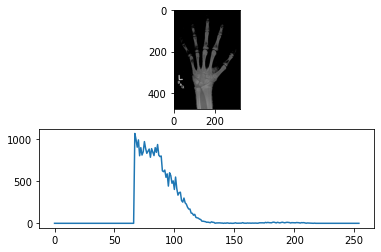

In [86]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi
import cv2

# Screen out non-bone pixels from "im"
mask_bone = im>=68
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone, cmap='gray')
axes[1].plot(hist)


## Tune a mask
Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

binary_dilation: Add pixels along edges
binary_erosion: Remove pixels along edges
binary_opening: Erode then dilate, "opening" areas near edges
binary_closing: Dilate then erode, "filling in" holes
For this exercise, create a bone mask then tune it to include additional pixels.

For the remaining exercises, we have run the following import for you:
```
import scipy.ndimage as ndi
```


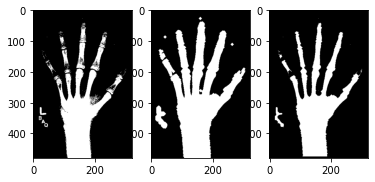

In [88]:
# Create and tune bone mask
mask_bone = im >68
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone, cmap='gray')
axes[1].imshow(mask_dilate, cmap='gray')
axes[2].imshow(mask_closed, cmap='gray')

## Filter convolutions
Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.

![image](Data/ConvolutionGif.gif)


For this exercise, smooth the foot radiograph. First, specify the weights to be used. (These are called "footprints" and "kernels" as well.) Then, convolve the filter with im and plot the result.

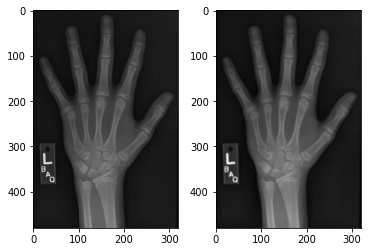

In [89]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap='gray')
axes[1].imshow(im_filt, cmap='gray')


## Smoothing
Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.

![image](Data/Gaussian1D.png)

The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

For this exercise, test the effects of applying Gaussian filters to the foot x-ray before creating a bone mask.



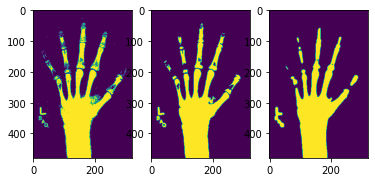

In [90]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 68)
axes[1].imshow(im_s1>=68)
axes[2].imshow(im_s3>=68)

## Detect edges (1)
Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane. A filter detecting horizontal edges might look like this:
```
weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]
```
For this exercise, create a vertical edge detector and see how well it performs on the hand x-ray (im).



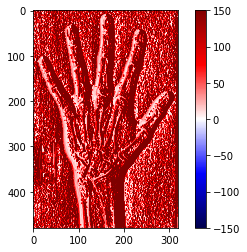

In [91]:
# Set weights to detect vertical edges
weights = [[+1,  0, -1],
           [+1,  0, -1],
           [+1,  0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()


## Detect edges (2)
Edge detection can be performed along multiple axes, then combined into a single edge value. For 2D images, the horizontal and vertical "edge maps" can be combined using the Pythagorean theorem:


One popular edge detector is the Sobel filter. The Sobel filter provides extra weight to the center pixels of the detector:
```
weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]
````
For this exercise, improve upon your previous detection effort by merging the results of two Sobel-filtered images into a composite edge map.



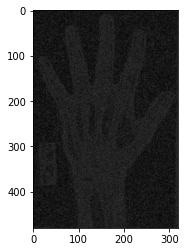

In [101]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im , axis=0)
sobel_ax1 = ndi.sobel(im , axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0)+np.square(sobel_ax1))

# Plot edge magnitude
plt.imshow(edges, cmap='gray', vmax=75)